<a href="https://colab.research.google.com/github/moutasemalakkad/Biodiversity_dashboard/blob/master/samsung_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install kaggle

In [ ]:
# to download directlt from Kaggle

# !pip install kaggle
# ! mkdir ~/.kaggle
# ! cp /content/drive/MyDrive/Samsung/kaggle.json ~/.kaggle/kaggle.json
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download -d paultimothymooney/kermany2018
# ! unzip kermany2018.zip

In [ ]:
# to get from Drive

! cp /content/drive/MyDrive/Samsung/retina_data.zip .
! unzip ./retina_data.zip

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Oct 22 21:37:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

import keras 
from keras import layers
from keras.models import Sequential
print(tf.__version__)

2.9.2


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# get image shape

import imageio as iio
 
# read an image
img = iio.imread('/content/data/test/CNV/CNV-1016042-1.jpeg')
input_shape = img.shape
input_shape

(496, 512)

In [87]:
batch_size = 32
img_height = 512
img_width = 496

In [115]:
# coursera 
train_dir = '/content/data/train'
print("Train Directory --> ", os.listdir(train_dir))

train_datagen = ImageDataGenerator(rescale=1./255)

train_data_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=128,
    class_mode='categorical'
) 

train_data_generator.image_shape

Train Directory -->  ['NORMAL', 'DRUSEN', 'CNV', 'DME']
Found 83484 images belonging to 4 classes.


(512, 496, 3)

In [116]:
test_dir = '/content/data/test'
print("test Directory --> ", os.listdir(test_dir))

test_datagen = ImageDataGenerator(rescale=1./255)

test_data_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=128,
    class_mode='categorical'
) 
test_data_generator.image_shape

test Directory -->  ['NORMAL', 'DRUSEN', 'CNV', 'DME']
Found 968 images belonging to 4 classes.


(512, 496, 3)

In [133]:
val_dir = '/content/data/val'
print("val Directory --> ", os.listdir(val_dir))

val_datagen = ImageDataGenerator(rescale=1./255)

val_data_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    class_mode='categorical'
) 

val_data_generator.image_shape

val Directory -->  ['NORMAL', 'DRUSEN', 'CNV', 'DME']
Found 32 images belonging to 4 classes.


(512, 496, 3)

In [70]:
class_names = train_data_generator.classes
print(set(class_names))

{0, 1, 2, 3}


In [119]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_data_generator.next():
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [120]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [139]:
num_classes = len(set(class_names))
print(num_classes)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #changed channel from 3 to 1

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

4


In [140]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [141]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 512, 496, 3)       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 512, 496, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 256, 248, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 256, 248, 32)      4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 128, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 128, 124, 64)    

In [143]:
checkpoint_filepath = './checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [145]:
class myCallback(keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
                print("\nReached 99% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True

model_accuracy_callback = myCallback()

In [ ]:
epochs=5
history = model.fit(
  train_data_generator,
  validation_data=val_data_generator,
  epochs=epochs,
  callbacks=[model_checkpoint_callback, model_accuracy_callback]
)

Epoch 1/5
653/653 [==============================] - 507s 773ms/step - loss: 1.2337 - accuracy: 0.4451 - val_loss: 1.5583 - val_accuracy: 0.2500
Epoch 2/5
653/653 [==============================] - 510s 780ms/step - loss: 1.2315 - accuracy: 0.4457 - val_loss: 1.6379 - val_accuracy: 0.2500
Epoch 3/5
298/653 [============>.................] - ETA: 4:36 - loss: 1.2307 - accuracy: 0.4444

In [ ]:
# You can also evaluate or predict on a dataset.
print("Evaluate")
result = model.evaluate(test_ds)
dict(zip(model.metrics_names, result))

Evaluate
31/31 [==============================] - 3s 91ms/step - loss: 0.8369 - accuracy: 0.6880


{'loss': 0.836898148059845, 'accuracy': 0.6880165338516235}

In [ ]:
history.history

{'loss': [0.6236635446548462],
 'accuracy': [0.7687820196151733],
 'val_loss': [0.8403626084327698],
 'val_accuracy': [0.75]}

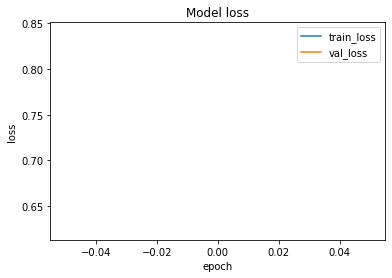

In [ ]:
# Plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

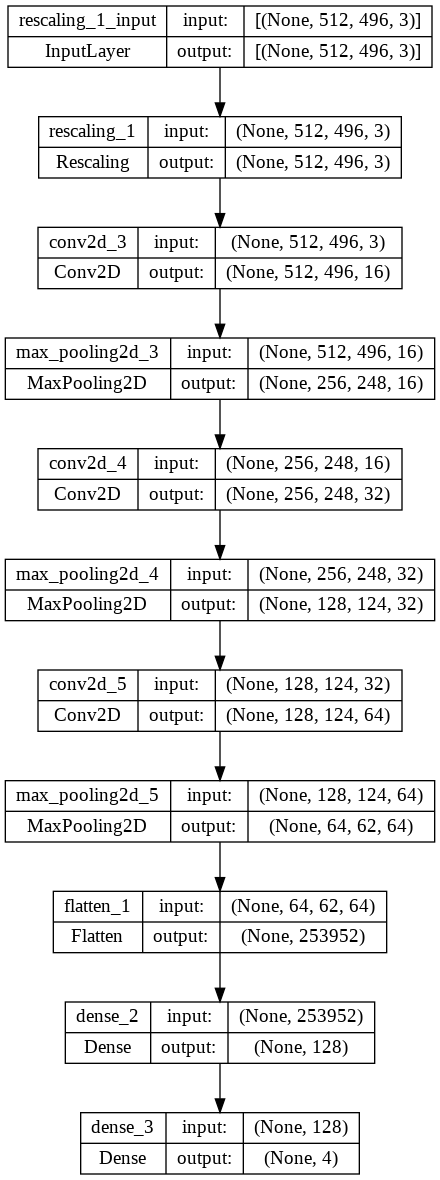

In [ ]:
# add this layer to the model

#normalization_layer = tf.keras.layers.Rescaling(1./255)



# we can remove the resizing ayer from the code (which we have done) and add it to the mdoel
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Resizing
# tf.keras.layers.Resizing(
#     height,
#     width,
#     interpolation='bilinear',
#     crop_to_aspect_ratio=False,
#     **kwargs
# )
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)